In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess=tf.Session()
iris=datasets.load_iris()
# 只需要花瓣的长度和宽度，也就是第三列和第四列
iris_petal=np.array([[x[2],x[3]] for x in iris.data])
# 并不认为上面这种方式很好
iris_petal=iris.data[:,2:]
# 个人倾向于这种
# 将三种结果分为两类
binary_target=np.array([1. if x==0 else 0. for x in iris.target])
# 不认同上面这种做法
binary_target=np.where(iris.target==0.,1.,0.)
# 声明批量训练大小，数据占位符，模型变量
batch_size=20
x1_data=tf.placeholder(shape=[None,1],dtype=tf.float32)
x2_data=tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(np.array([[1.]],dtype=np.float32))
b=tf.Variable(np.array([[1.]],dtype=np.float32))
# 声明计算公式
mul_1=tf.matmul(x2_data,A)
add_1=tf.add(mul_1,b)
estimate_y=tf.add(add_1,x1_data)
# 声明损失函数
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_target,logits=estimate_y))
# 声明迭代器
train_gd=tf.train.GradientDescentOptimizer(0.05)
train_value=train_gd.minimize(loss)
# 初始化变量
init=tf.initialize_all_variables()
sess.run(init)
# 声明容器用于存储变量
A_list=[]
b_list=[]
loss_list=[]
# 开始迭代
for i in range(1000):
    train_num=np.random.choice(150,size=batch_size)
    x1_train=iris_petal[train_num,:1]
    x2_train=iris_petal[train_num,1:]
    y_train=np.array([binary_target[train_num]]).T
    sess.run(train_value,feed_dict={x1_data:x1_train,x2_data:x2_train,y_target:y_train})
    [[A1]]=sess.run(A)
    [[b1]]=sess.run(b)
    A_list.append(A1)
    b_list.append(b1)
    loss_list.append(sess.run(loss,feed_dict={x1_data:x1_train,x2_data:x2_train,y_target:y_train}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.


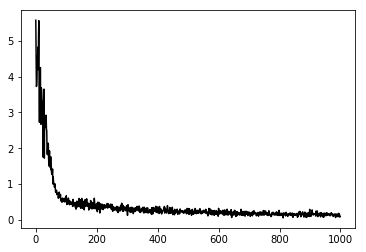

In [2]:
# 1000次迭代的LOSS FUNCTION结果
xrange=np.arange(1000)
plt.plot(xrange,loss_list,'k-',label='Loss')
plt.show()

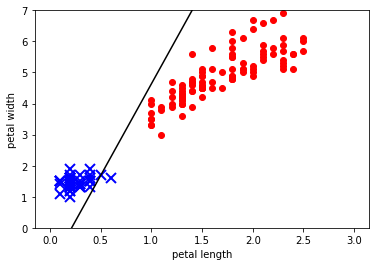

In [3]:
# 分类结果
[[slope]]=sess.run(A) # 真黑科技！！！！！！！
[[intercept]]=sess.run(b)
x=np.linspace(0,3,num=100)
line=-slope*x-intercept
setorapoint_y=iris_petal[binary_target==1.,0]
setorapoint_x=iris_petal[binary_target==1.,1]
nonsetorapoint_y=iris_petal[binary_target==0.,0]
nonsetorapoint_x=iris_petal[binary_target==0.,1]
plt.plot(setorapoint_x,setorapoint_y,'bx',ms=10,mew=2,label='setosa')
plt.plot(nonsetorapoint_x,nonsetorapoint_y,'ro',label='non-setosa')
plt.plot(x,line,'k-',label='Linear-classify')
plt.ylim([0.0,7.0])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()
plt.close()

In [4]:
# Attention
# python 的一种用法，这种用法只能在内部使用
# 而且似乎只能在list里面使用
[x**2 for x in [1,2,3,4,5] if x%2==0]

[4, 16]